In [11]:
# loading necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from scipy.stats import shapiro

In [12]:
df = pd.read_csv(r'C:\Users\User\Desktop\spotify\top50.csv', encoding='latin-1')

In [13]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [14]:
#There is no null in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [15]:

df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [16]:
df['Artist.Name'].value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist.Name, dtype: int64

In [17]:
 len(df)

50

In [18]:
df['Artist.Name'].value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist.Name, dtype: int64

In [21]:
label1 = df_Artist.index.values.tolist()

In [26]:
label1

['Ed Sheeran',
 'Shawn Mendes',
 'Lil Nas X',
 'J Balvin',
 'Sech',
 'Billie Eilish',
 'The Chainsmokers',
 'Marshmello',
 'Post Malone',
 'Ariana Grande',
 'ROSALÍA',
 'Khalid',
 'Lady Gaga',
 'Daddy Yankee',
 'Kygo',
 'Lauv',
 'Jonas Brothers',
 'Martin Garrix',
 'Katy Perry',
 'Young Thug',
 'Maluma',
 'Taylor Swift',
 'Jhay Cortez',
 'Ali Gatie',
 'Tones and I',
 'Lunay',
 'Anuel AA',
 'MEDUZA',
 'Lizzo',
 'Y2K',
 'Chris Brown',
 'Drake',
 'Lewis Capaldi',
 'DJ Snake',
 'Bad Bunny',
 'Sam Smith',
 'Lil Tecca',
 'Nicky Jam']

In [22]:
# Find percent of each genre
df_Artist = df['Artist.Name'].value_counts() / len(df)
sizes1 = df_Artist.values.tolist()
label1 = df_Artist.index.values.tolist()
df_Artist.sort_values(ascending=False)

Ed Sheeran          0.08
Lil Nas X           0.04
J Balvin            0.04
Sech                0.04
Billie Eilish       0.04
The Chainsmokers    0.04
Marshmello          0.04
Post Malone         0.04
Ariana Grande       0.04
Shawn Mendes        0.04
Chris Brown         0.02
Anuel AA            0.02
MEDUZA              0.02
Lizzo               0.02
Y2K                 0.02
Sam Smith           0.02
Drake               0.02
Lewis Capaldi       0.02
DJ Snake            0.02
Bad Bunny           0.02
Tones and I         0.02
Lil Tecca           0.02
Lunay               0.02
Young Thug          0.02
Ali Gatie           0.02
Jhay Cortez         0.02
Taylor Swift        0.02
Maluma              0.02
Katy Perry          0.02
Martin Garrix       0.02
Jonas Brothers      0.02
Lauv                0.02
Kygo                0.02
Daddy Yankee        0.02
Lady Gaga           0.02
Khalid              0.02
ROSALÍA             0.02
Nicky Jam           0.02
Name: Artist.Name, dtype: float64

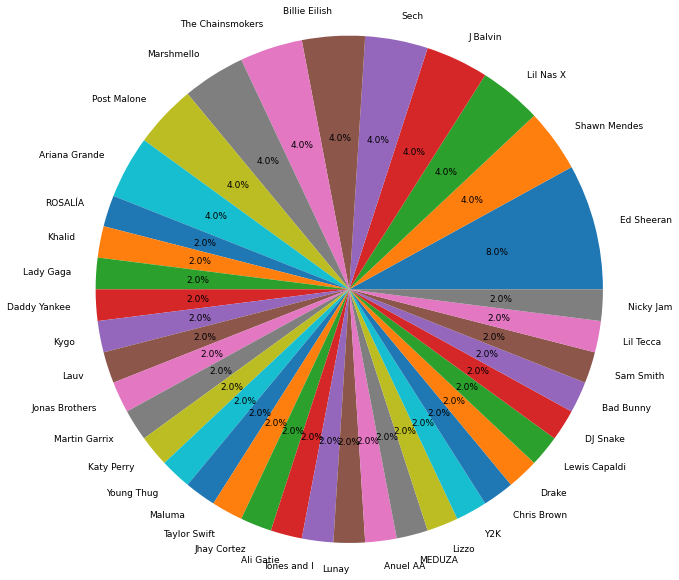

In [28]:
# The precentage of Artist showed in the list
fig2, ax2= plt.subplots(figsize=(10,10))
ax2.pie(sizes1, labels=label1, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 9})
ax2.axis('equal')
plt.show()

In [29]:
# dance pop is the highest gener with 8 counts, pop is the second with 7 count and latin is third with 5 counts. 
#The rest of genres are all under 3 counts 
df['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: Genre, dtype: int64

In [30]:
# Find percent of each genre
df_genre = df['Genre'].value_counts() / len(df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()
df_genre.sort_values(ascending=False)

dance pop           0.16
pop                 0.14
latin               0.10
canadian hip hop    0.06
edm                 0.06
electropop          0.04
brostep             0.04
dfw rap             0.04
country rap         0.04
canadian pop        0.04
panamanian pop      0.04
reggaeton flow      0.04
reggaeton           0.04
trap music          0.02
escape room         0.02
pop house           0.02
australian pop      0.02
atl hip hop         0.02
big room            0.02
boy band            0.02
r&b en espanol      0.02
Name: Genre, dtype: float64

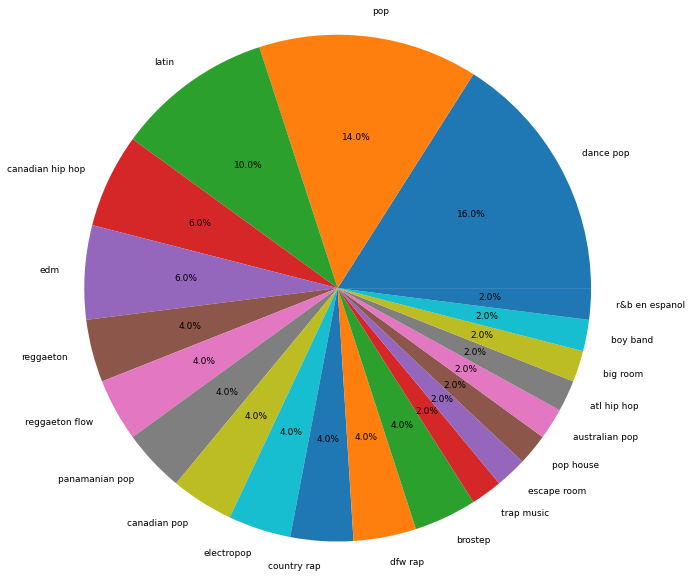

In [31]:
# Pie chart for genre 
# Pop is 14% and Dance Pop is 15%, latin is 10% and the rest all under 6%
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 9})
ax1.axis('equal')
plt.show()

In [32]:
df = df.iloc[: , 1:]
df

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


<AxesSubplot:>

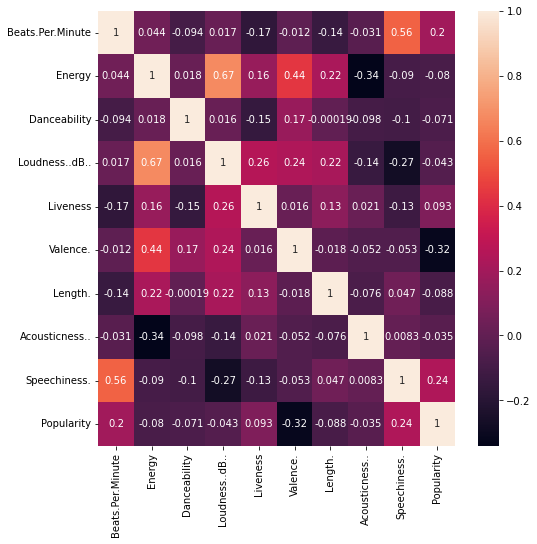

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.drop(['Track.Name', 'Artist.Name','Genre'],axis=1).corr(),annot=True)

In [34]:
df.sort_values('Popularity',ascending=False)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


In [122]:
df[['Beats.Per.Minute', 'Energy','Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity']].corr()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


<AxesSubplot:title={'center':'Energy'}, ylabel='Energy'>

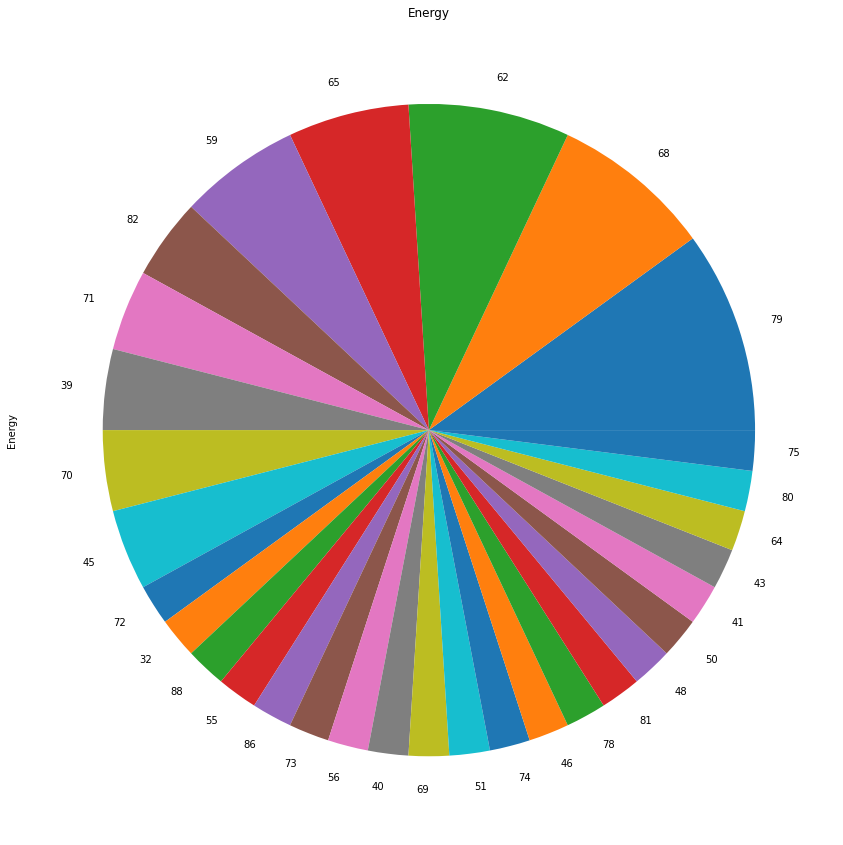

In [35]:
# The highest number of Energy is 79. 
df['Energy'].value_counts().plot(kind = 'pie',
                                        title = 'Energy', figsize = (15,15), layout=(20,2))

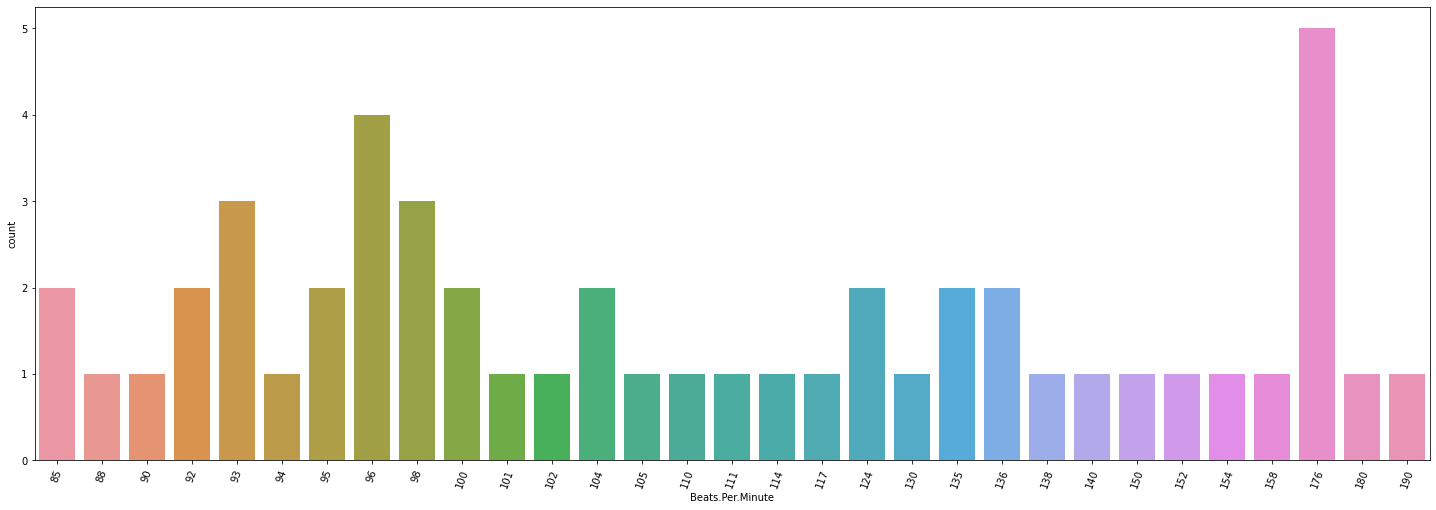

In [36]:
#The highest beat per min is 176 beats
fig=plt.figure(figsize=(25,10))
sns.countplot('Beats.Per.Minute',data=df)
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(70)
    plt.subplots_adjust(bottom=0.25)
plt.show()

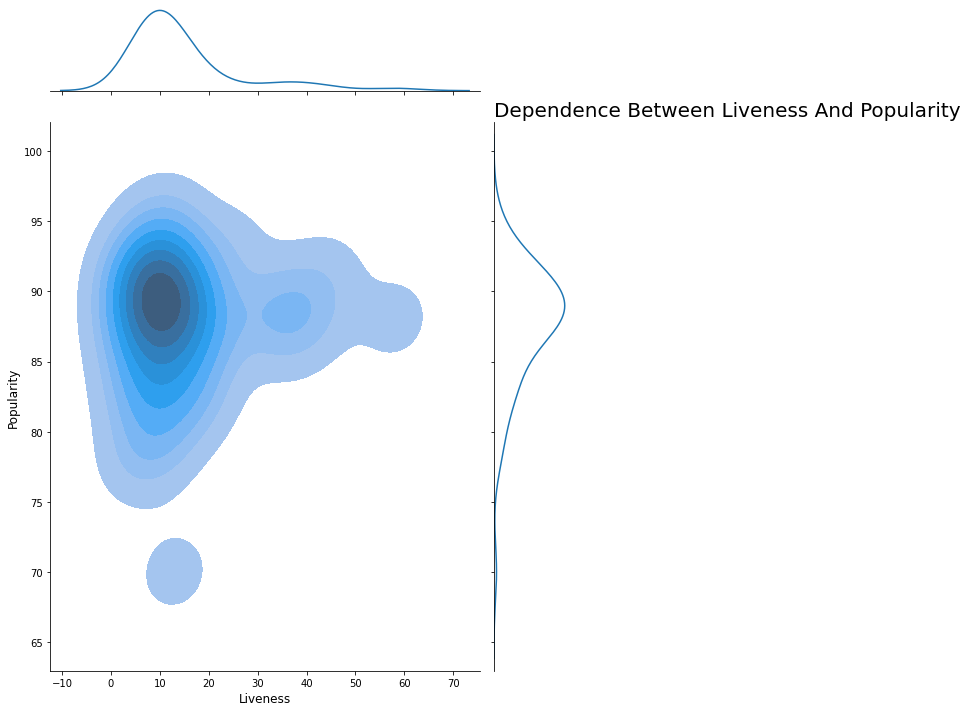

In [38]:
# The higher popularity has lower Liveness
h=sns.jointplot(x=df["Liveness"].values, y=df['Popularity'].values, height=10, kind="kde",shade=True)
plt.title('Dependence Between Liveness And Popularity', fontsize = 20, loc ='left')
h.set_axis_labels('Liveness', 'Popularity', fontsize=12)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, "Valence's Density Of Tracks")

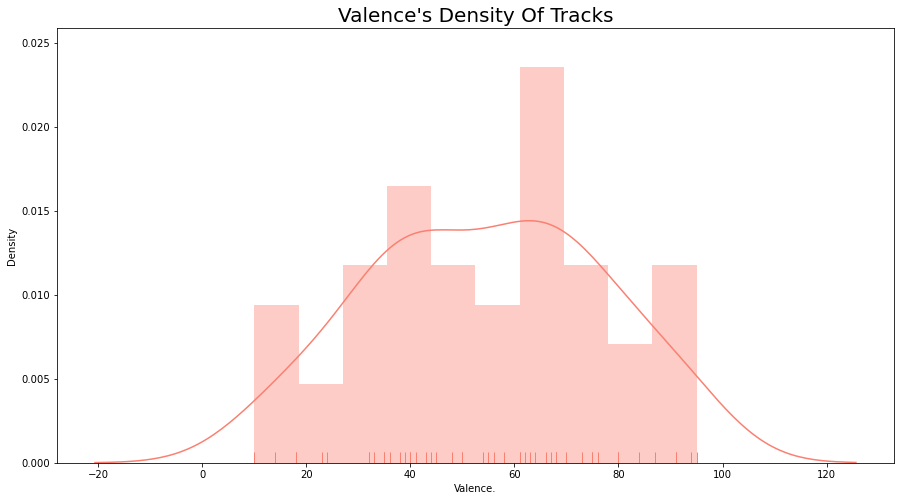

In [39]:
#The majority  of Valence is around 40-80
plt.figure(figsize=(15, 8))
rate = df['Valence.']
sns.distplot(rate,color="salmon",bins=10, rug=True, kde=True) 
plt.title("Valence's Density Of Tracks", fontsize = 20)

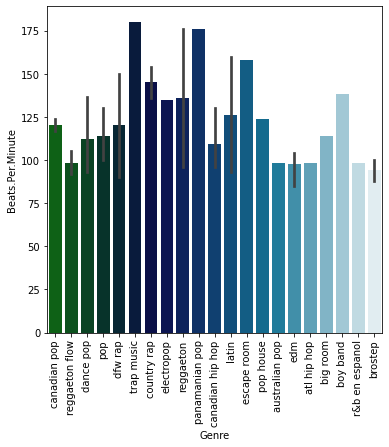

In [153]:
# The brostep has the lowest beats per minute and trap music has the lowest
plt.figure(figsize=(6,6))
sns.barplot(x=df['Genre'], y=df['Beats.Per.Minute'], palette='ocean')
plt.xticks(rotation=90)
plt.show()

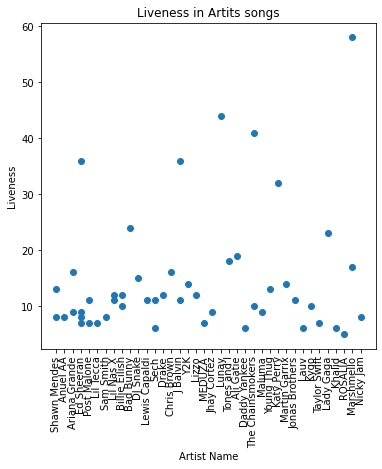

In [155]:
plt.figure(figsize=(6,6))
ax=plt.axes()
ax.scatter(df['Artist.Name'], df['Liveness'])
ax.set(xlabel='Artist Name',
       ylabel='Liveness',
       title='Liveness in Artits songs');
plt.xticks(rotation=90)
plt.show()

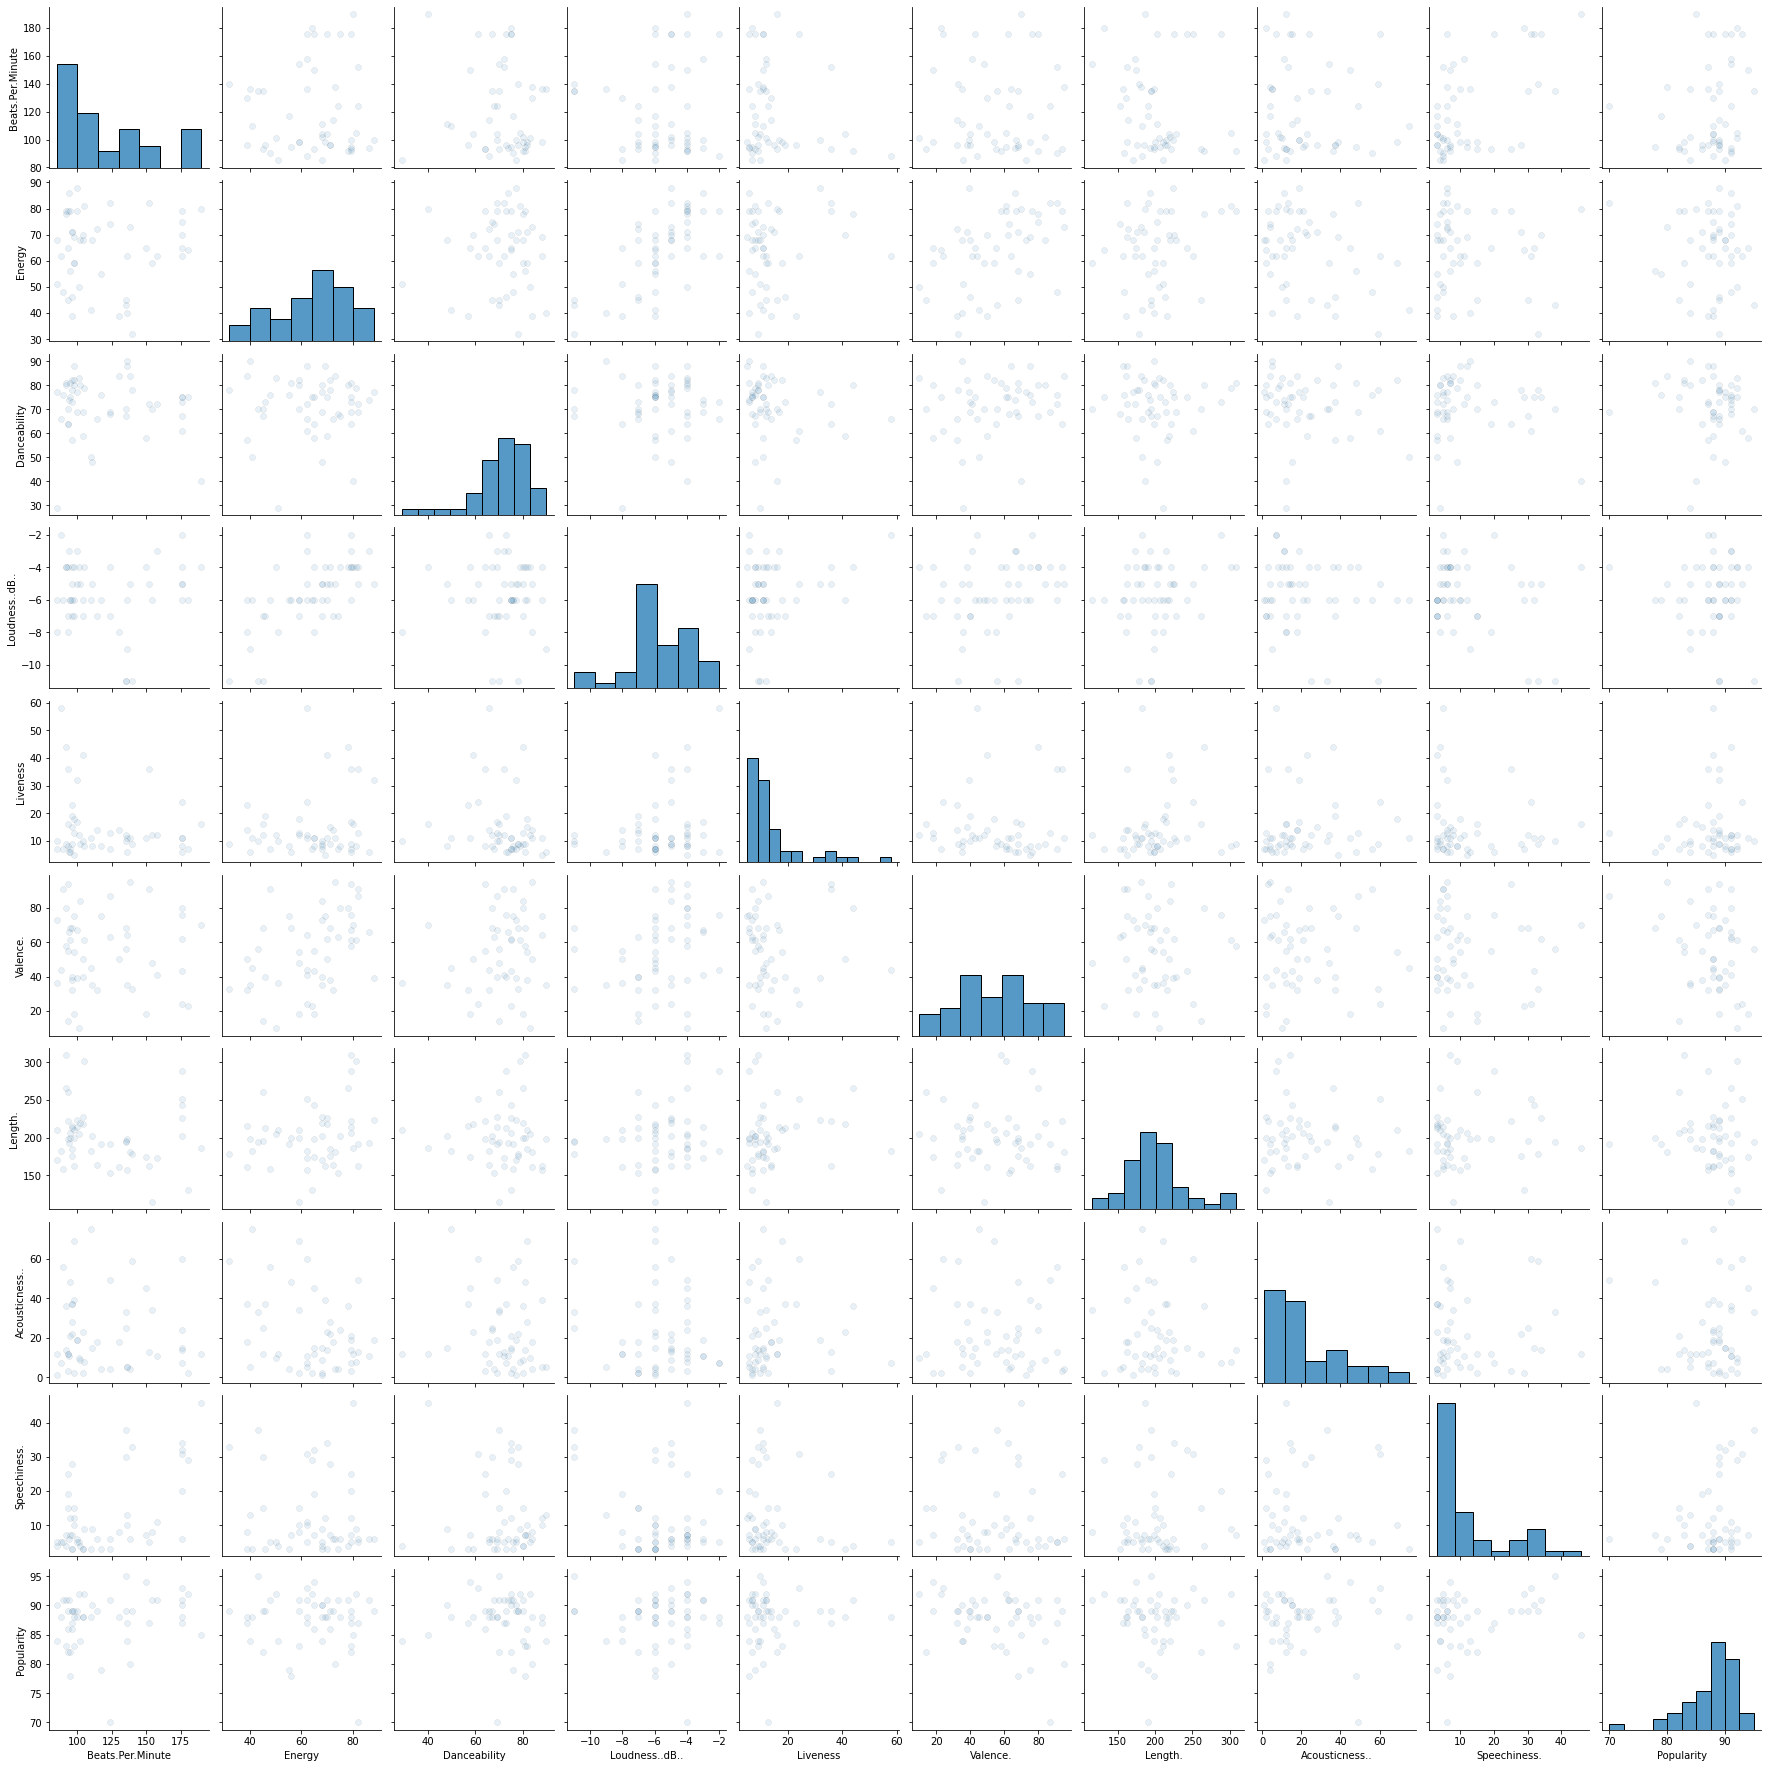

In [156]:
sns.pairplot(df, plot_kws=dict(alpha=0.1, edgecolor='black'))

In [157]:
df_num = df[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity']]
df_cat = df[['Track.Name', 'Artist.Name', 'Genre']]

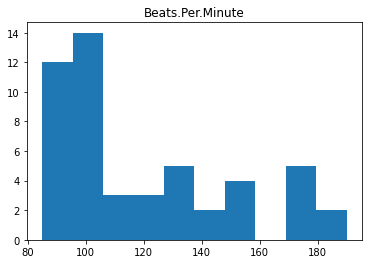

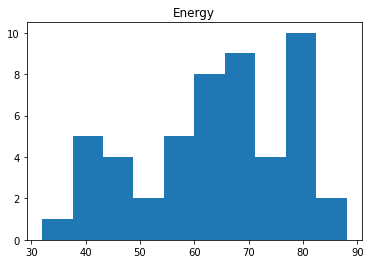

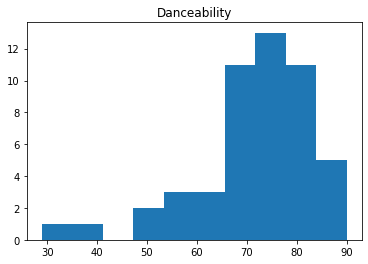

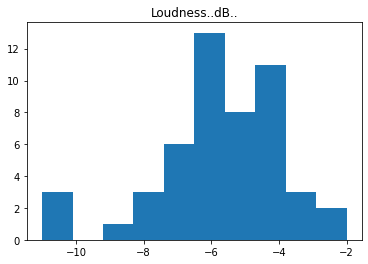

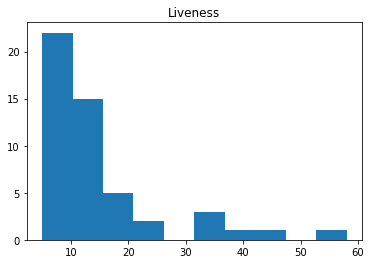

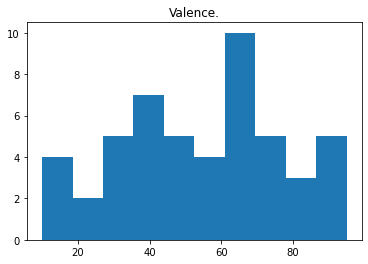

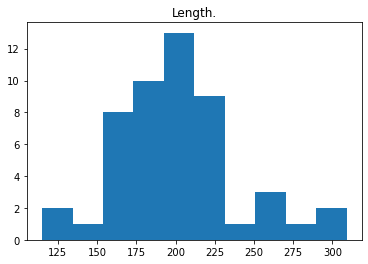

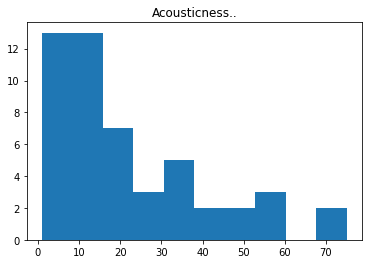

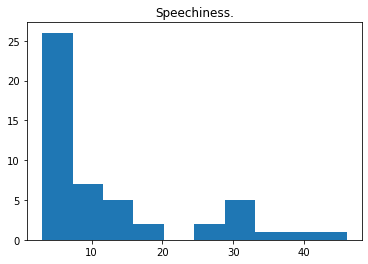

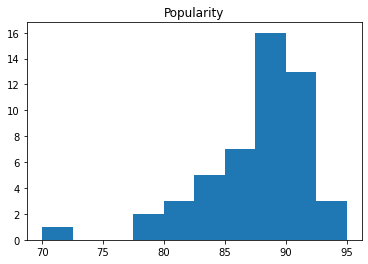

In [158]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

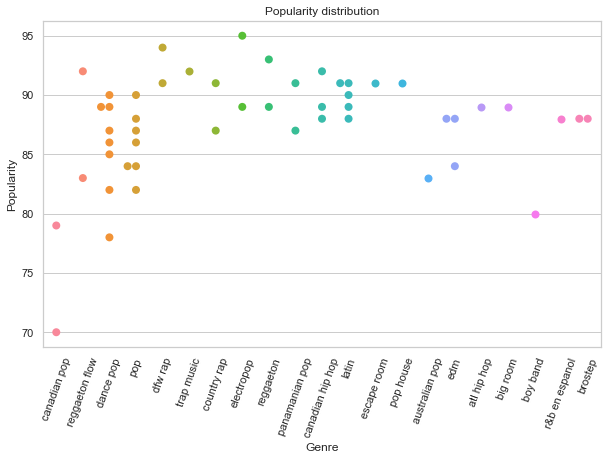

In [160]:
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
plot = sns.swarmplot(x='Genre', y='Popularity', data=df, size=8)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Popularity distribution')
plt.show()

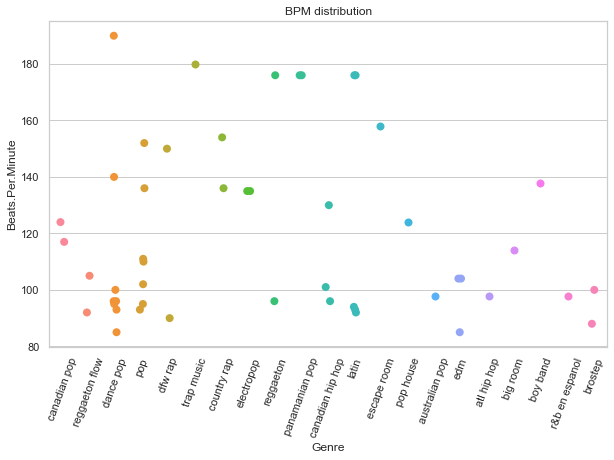

In [161]:
# In this chart you can see that different Genre has different Beat Per Minute
plt.figure(figsize = (10,6))
#sns.set_theme(style="whitegrid")
plot = sns.stripplot(x='Genre', y='Beats.Per.Minute', data=df, size=8)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('BPM distribution')
plt.show()

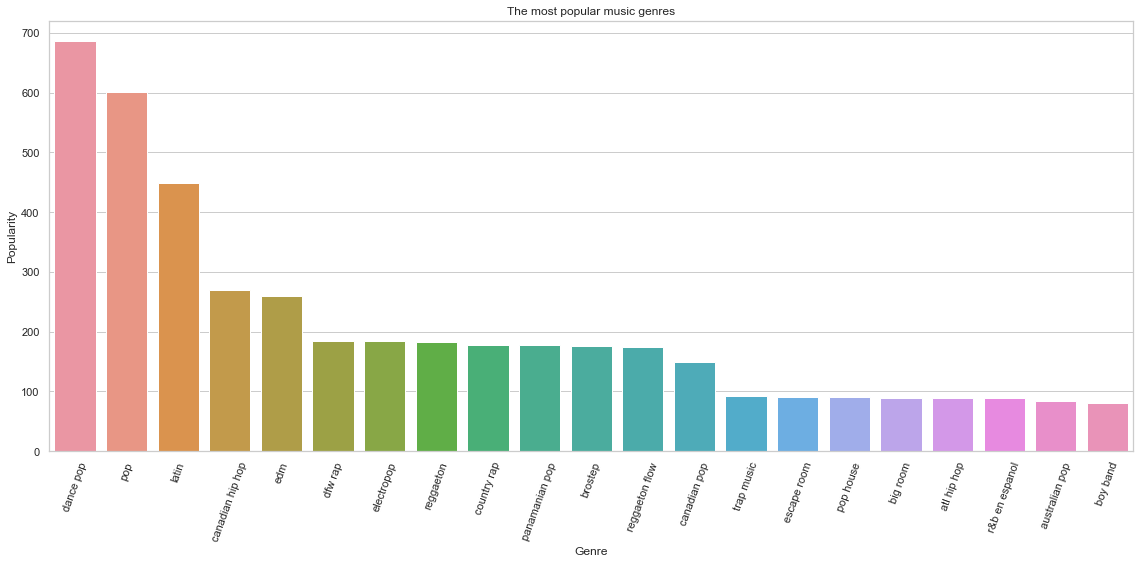

In [162]:
# Dance Pop has the highest popularity
plt.figure(figsize = (16,8))
genre_grouped = df.groupby('Genre')['Popularity'].sum().sort_values(ascending=False)
chart = sns.barplot(x=genre_grouped.index, y=genre_grouped)
plt.xticks(rotation=70)
plt.title('The most popular music genres')
plt.tight_layout() 

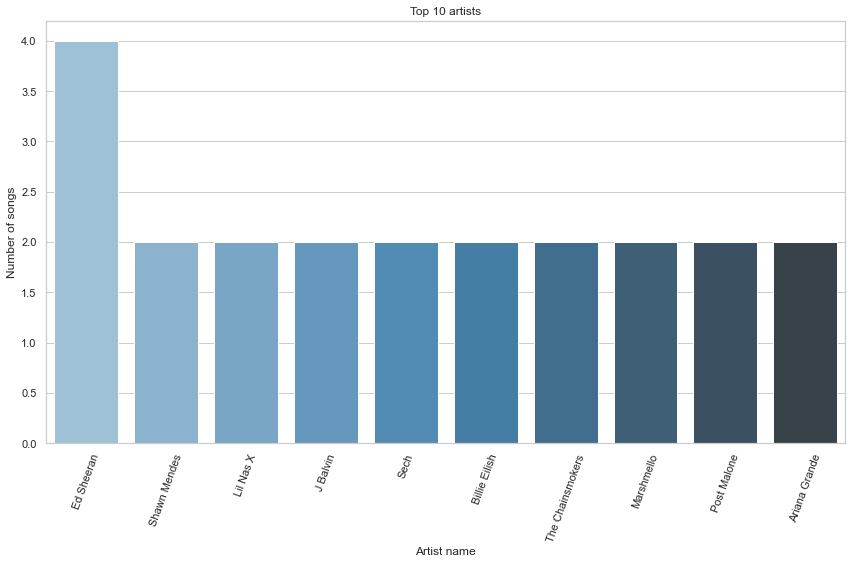

In [163]:
plt.figure(figsize = (12,8))
artist = df['Artist.Name'].value_counts()[:10]
sns.barplot(x=artist.index, y=artist, palette="Blues_d")
plt.xticks(rotation=70)
plt.xlabel('Artist name')
plt.ylabel('Number of songs')
plt.title('Top 10 artists')
plt.tight_layout()

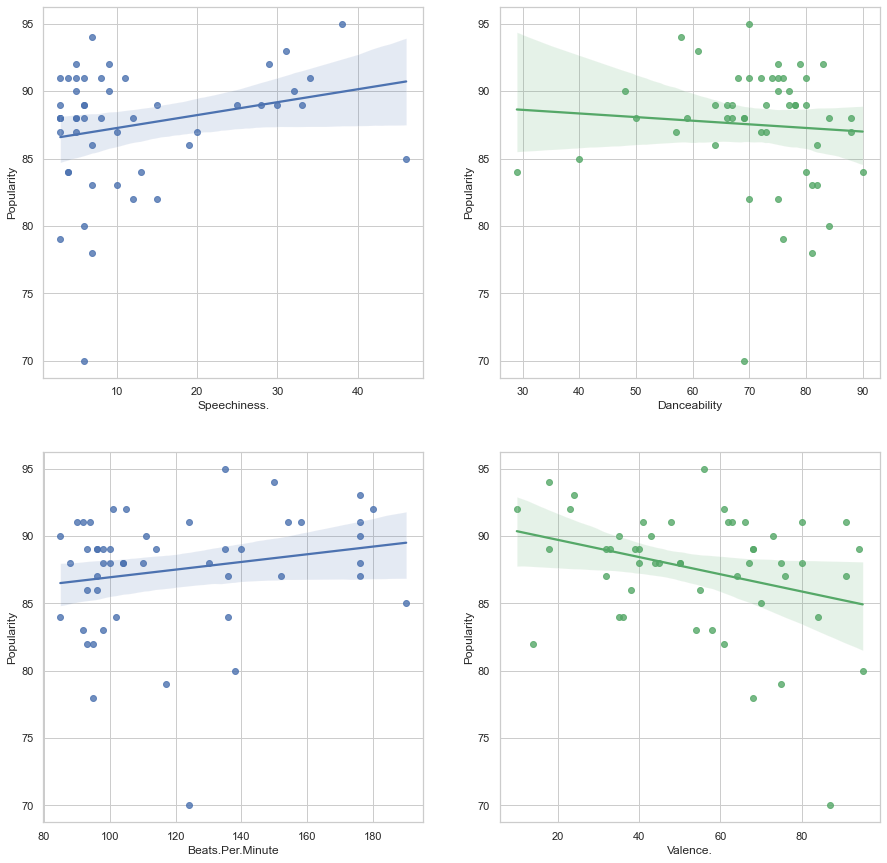

In [164]:
# the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses
#Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality. 
#It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.
#regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. 
#In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data.
# The lower speechness the higher popularity 
# The higher danceable the higher popularity 
# Beat and Popularity ??
fig,axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.regplot(x='Danceability',y='Popularity', ax=axs[0,1], data=df,color='g')
sns.regplot(x='Speechiness.',y='Popularity', ax=axs[0,0], data=df)
sns.regplot(x='Beats.Per.Minute',y='Popularity', ax=axs[1,0], data=df)
sns.regplot(x='Valence.',y='Popularity', ax=axs[1,1], data=df,color='g')
plt.show()